In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
car_df=pd.read_csv(r'C:\\Users\HP\Downloads\Car_Purchasing_Data.csv')

In [3]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
car_df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
car_df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [11]:
x=car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [12]:
y=car_df['Car Purchase Amount']

In [13]:
scale_x=MinMaxScaler()
x_scaled=scale_x.fit_transform(x)

In [20]:
scale_y=MinMaxScaler()
y=y.reshape(-1,1)
y_scaled=scale_y.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,random_state=42,test_size=0.25)

In [23]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model=Sequential()
model.add(Dense(25,input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [35]:
epoch=model.fit(x_train,y_train,batch_size=25,epochs=20,validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 0s 6ms/step - loss: 3.6880e-05 - accuracy: 0.0033 - val_loss: 3.6470e-05 - val_accuracy: 0.0133
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 3.0782e-05 - accuracy: 0.0033 - val_loss: 2.9825e-05 - val_accuracy: 0.0133
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 2.9240e-05 - accuracy: 0.0033 - val_loss: 3.3214e-05 - val_accuracy: 0.0133
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 3.0669e-05 - accuracy: 0.0033 - val_loss: 3.0915e-05 - val_accuracy: 0.0133
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 2.9278e-05 - accuracy: 0.0033 - val_loss: 4.0865e-05 - val_accuracy: 0.0133
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 3.0628e-05 - accuracy: 0.0033 - val_loss: 3.8689e-05 - val_accuracy: 0.0133
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 2.6718e-05 - accuracy: 0.0033 - val_loss

In [37]:
print(epoch.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


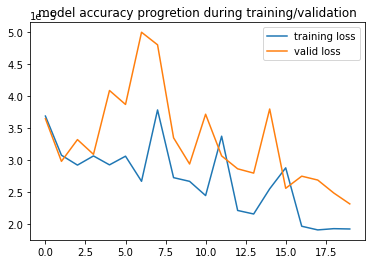

In [40]:
plt.plot(epoch.history['loss'])
plt.plot(epoch.history['val_loss'])
plt.title('model accuracy progretion during training/validation')
plt.legend(['training loss','valid loss'])

In [41]:
x_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
y_predict=model.predict(x_test_sample)
y_predict_orig=scale_y.inverse_transform(y_predict)
print('ur amount =',y_predict_orig)

ur amount = [[35111.855]]
